In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import random

In [3]:
df = pd.read_excel("customer_churn_large_dataset.xlsx")
df.sample(5)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
24205,24206,Customer_24206,56,Male,New York,19,79.45,472,0
95496,95497,Customer_95497,35,Female,Los Angeles,20,89.59,472,0
31741,31742,Customer_31742,67,Male,Chicago,23,98.69,146,0
34452,34453,Customer_34453,20,Female,Miami,11,90.23,269,1
65715,65716,Customer_65716,69,Female,Los Angeles,7,70.79,70,0


In [4]:
df.drop('CustomerID', axis='columns', inplace=True)

In [5]:
df.dtypes

Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [6]:
df.isnull()

,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False


In [7]:
null_value = df.isnull().sum()
print(null_value)

Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64


In [8]:
df.shape

(100000, 8)

In [9]:
df.dtypes

Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

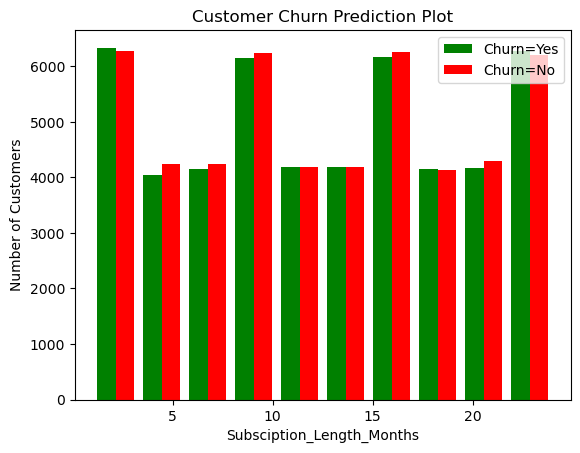

In [10]:
length_churn_no = df[df.Churn==0].Subscription_Length_Months
length_churn_yes = df[df.Churn==1].Subscription_Length_Months

plt.xlabel('Subsciption_Length_Months')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Plot')

plt.hist([length_churn_yes, length_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

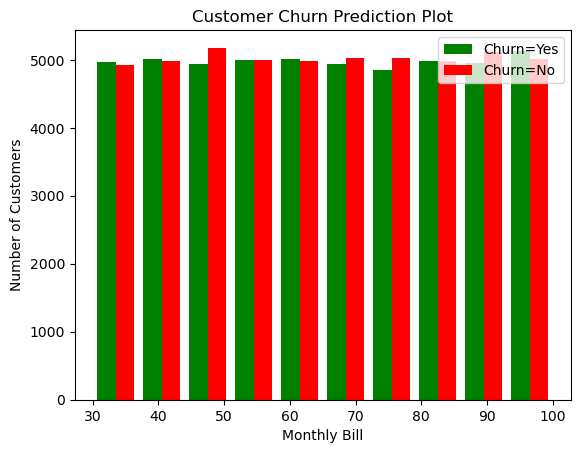

In [11]:
length_churn_no = df[df.Churn==0].Monthly_Bill
length_churn_yes = df[df.Churn==1].Monthly_Bill

plt.xlabel('Monthly Bill')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Plot')

plt.hist([length_churn_yes, length_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

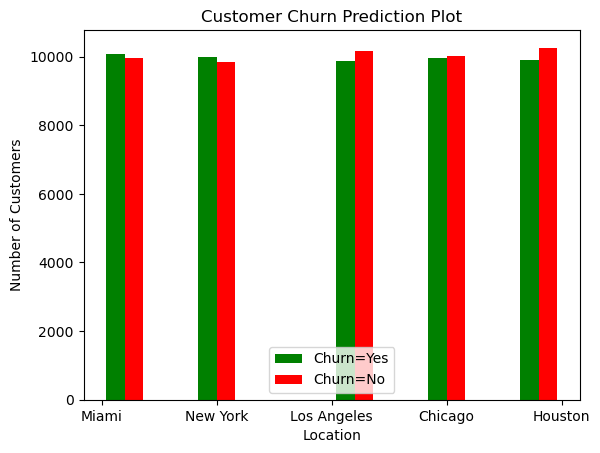

In [12]:
length_churn_no = df[df.Churn==0].Location
length_churn_yes = df[df.Churn==1].Location

plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Plot')

plt.hist([length_churn_yes, length_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

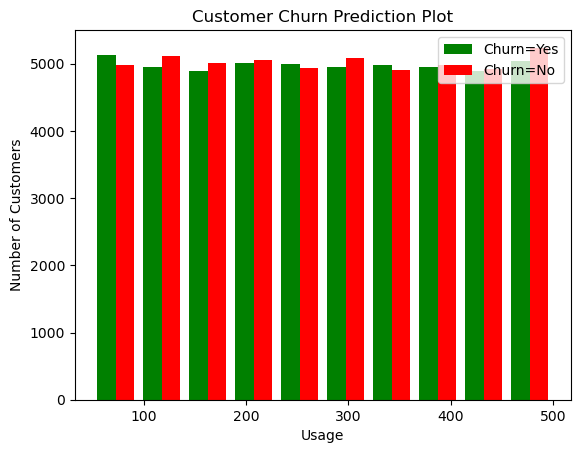

In [13]:
length_churn_no = df[df.Churn==0].Total_Usage_GB
length_churn_yes = df[df.Churn==1].Total_Usage_GB

plt.xlabel('Usage')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Plot')

plt.hist([length_churn_yes, length_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [14]:
def print_unique_col_val(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

In [15]:
print_unique_col_val(df)

Name : ['Customer_1' 'Customer_2' 'Customer_3' ... 'Customer_99998'
 'Customer_99999' 'Customer_100000']
Gender : ['Male' 'Female']
Location : ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


In [16]:
df['Gender'].replace({'Female':1, 'Male':0}, inplace=True)


In [17]:
print_unique_col_val(df)

Name : ['Customer_1' 'Customer_2' 'Customer_3' ... 'Customer_99998'
 'Customer_99999' 'Customer_100000']
Location : ['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']


In [18]:
df['Gender'].unique()

array([0, 1], dtype=int64)

In [19]:
df = pd.get_dummies(data=df,columns=['Location'])

In [20]:
df.sample(800
        )

,Name,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
7868,Customer_7869,20,1,9,89.41,241,1,0,1,0,0,0
66426,Customer_66427,48,1,4,95.25,456,1,0,0,1,0,0
4516,Customer_4517,67,1,2,79.96,294,1,0,1,0,0,0
39628,Customer_39629,19,1,20,64.82,84,1,0,1,0,0,0
60473,Customer_60474,21,1,21,55.45,431,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30394,Customer_30395,20,1,14,93.51,417,0,1,0,0,0,0
12415,Customer_12416,66,0,8,76.63,273,1,0,0,1,0,0
76293,Customer_76294,26,1,17,76.47,388,1,0,0,0,0,1
31163,Customer_31164,44,1,19,86.63,442,0,0,0,0,0,1


In [21]:
length_churn_no = df[df.Churn==0].Location
length_churn_yes = df[df.Churn==1].Location

plt.xlabel('Location')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Plot')

plt.hist([length_churn_yes, length_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'Location'

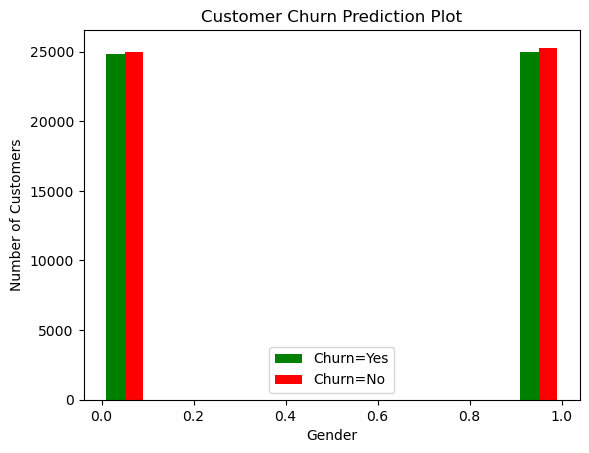

In [22]:
length_churn_no = df[df.Churn==0].Gender
length_churn_yes = df[df.Churn==1].Gender

plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Plot')

plt.hist([length_churn_yes, length_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [23]:
df.dtypes

Name                           object
Age                             int64
Gender                          int64
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
Location_Chicago                uint8
Location_Houston                uint8
Location_Los Angeles            uint8
Location_Miami                  uint8
Location_New York               uint8
dtype: object

In [24]:
df.drop('Name', axis='columns', inplace=True)

In [25]:
df.sample(5)

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
17234,53,1,3,36.14,72,0,0,0,0,1,0
89501,67,0,7,48.16,115,0,0,0,0,1,0
44804,39,0,15,79.34,78,1,0,0,0,0,1
80415,27,1,19,33.65,230,1,0,0,1,0,0
66238,51,0,12,36.02,137,1,0,0,0,0,1


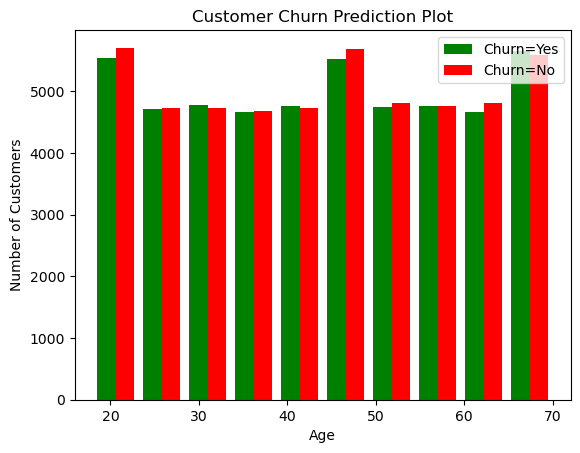

In [26]:
length_churn_no = df[df.Churn==0].Age
length_churn_yes = df[df.Churn==1].Age

plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Plot')

plt.hist([length_churn_yes, length_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [27]:
df.sample(5)

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
51188,29,0,11,84.12,172,1,0,1,0,0,0
74135,65,0,24,95.35,338,0,1,0,0,0,0
50665,44,1,17,53.97,256,1,0,1,0,0,0
35455,21,0,3,83.43,387,0,0,0,1,0,0
88746,27,1,14,85.53,323,0,0,0,1,0,0


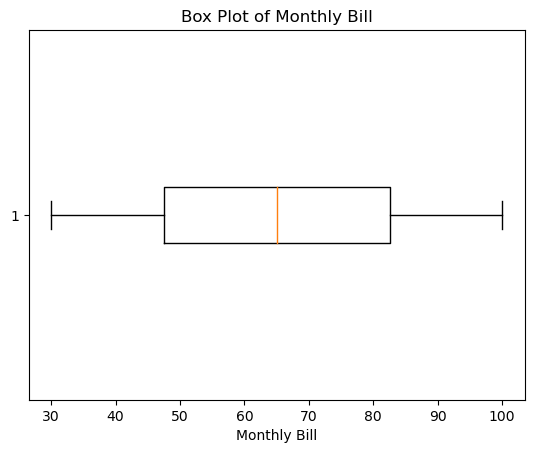

In [28]:
plt.boxplot(df["Monthly_Bill"], vert=False)  # vert=False for horizontal box plot
plt.title('Box Plot of Monthly Bill')
plt.xlabel('Monthly Bill')
plt.show()

In [29]:
import seaborn as sns

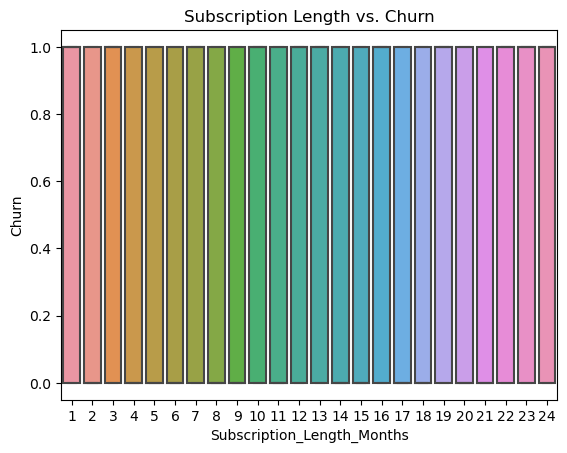

In [30]:
sns.boxplot(x='Subscription_Length_Months', y='Churn', data=df)
plt.title('Subscription Length vs. Churn')
plt.xlabel('Subscription_Length_Months')
plt.ylabel('Churn')
plt.show()

In [31]:
df['Bill_to_Usage_Ratio'] = df['Subscription_Length_Months'] / df['Total_Usage_GB']

In [32]:
print(df)

       Age  Gender  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  \
0       63       0                          17         73.36             236   
1       62       1                           1         48.76             172   
2       24       1                           5         85.47             460   
3       36       1                           3         97.94             297   
4       46       1                          19         58.14             266   
...    ...     ...                         ...           ...             ...   
99995   33       0                          23         55.13             226   
99996   62       1                          19         61.65             351   
99997   64       0                          17         96.11             251   
99998   51       1                          20         49.25             434   
99999   27       1                          19         76.57             173   

       Churn  Location_Chicago  Locatio

In [33]:
df.sample(5)

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Bill_to_Usage_Ratio
18821,23,1,22,74.32,376,0,0,1,0,0,0,0.058511
67921,20,0,5,98.63,322,0,0,0,1,0,0,0.015528
35509,36,0,23,90.18,156,0,0,0,1,0,0,0.147436
83356,66,1,3,39.01,401,1,0,1,0,0,0,0.007481
90961,23,1,21,41.97,342,0,0,0,0,1,0,0.061404


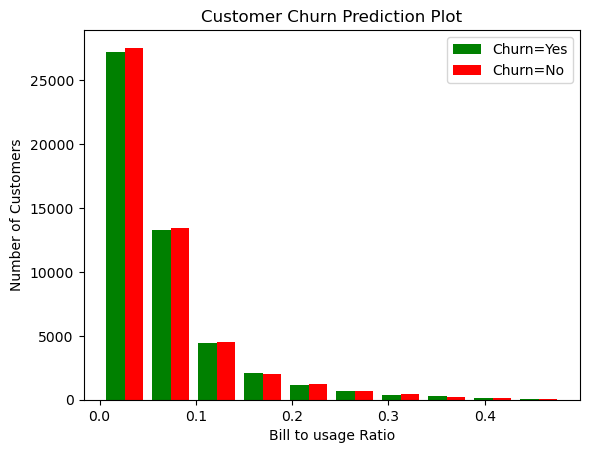

In [34]:
length_churn_no = df[df.Churn==0].Bill_to_Usage_Ratio
length_churn_yes = df[df.Churn==1].Bill_to_Usage_Ratio

plt.xlabel('Bill to usage Ratio')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Plot')

plt.hist([length_churn_yes, length_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [35]:
df.sample(5)

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Bill_to_Usage_Ratio
37297,49,0,21,65.28,268,1,0,0,0,1,0,0.078358
17229,59,1,6,83.62,423,0,0,1,0,0,0,0.014184
24522,18,1,4,53.10,428,0,0,1,0,0,0,0.009346
53457,30,0,10,39.38,179,1,0,1,0,0,0,0.055866
34401,56,0,20,74.97,159,1,0,1,0,0,0,0.125786


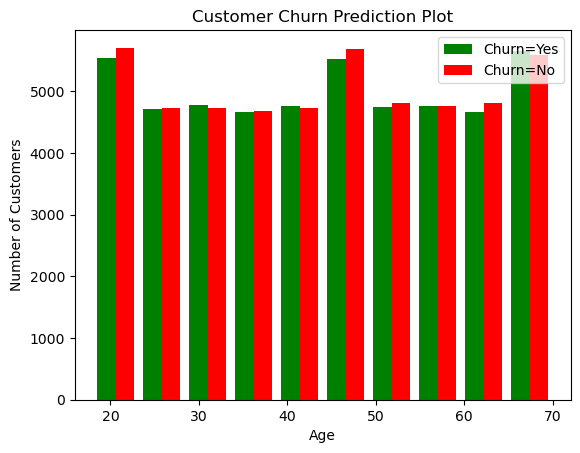

In [36]:
length_churn_no = df[df.Churn==0].Age
length_churn_yes = df[df.Churn==1].Age

plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Plot')

plt.hist([length_churn_yes, length_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [37]:
df["Subscription_Length_Months_to_Age_ratio"] = df["Subscription_Length_Months"]/df["Age"]

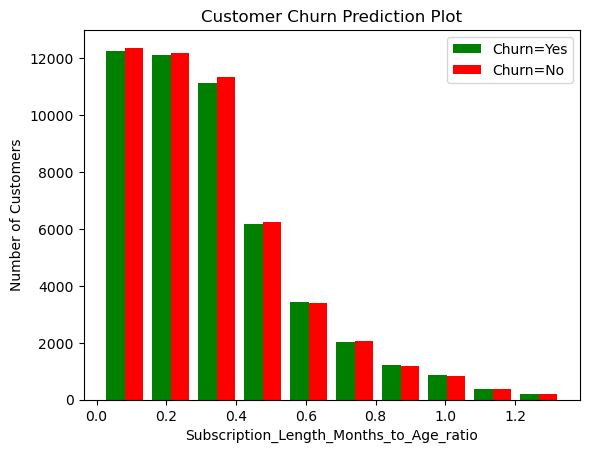

In [38]:
length_churn_no = df[df.Churn==0].Subscription_Length_Months_to_Age_ratio
length_churn_yes = df[df.Churn==1].Subscription_Length_Months_to_Age_ratio

plt.xlabel('Subscription_Length_Months_to_Age_ratio')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Plot')

plt.hist([length_churn_yes, length_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

(0.0, 500.0)

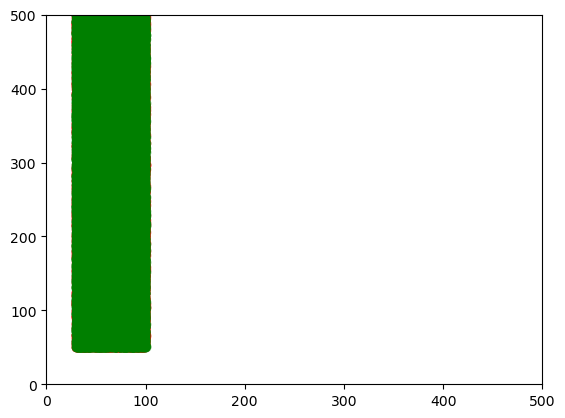

In [39]:
churned_customers = df[df['Churn']==1]
non_churned_customers = df[df['Churn']==0]

sample_size = len(churned_customers)
non_churned_sample = non_churned_customers.sample(sample_size, random_state=42)

plt.scatter(
    churned_customers['Monthly_Bill'],
    churned_customers['Total_Usage_GB'],
    c='red',
    label = 'Churned Customers',
    alpha=0.5
)

plt.scatter(
    non_churned_customers['Monthly_Bill'],
    non_churned_customers['Total_Usage_GB'],
    c='green',
    label = 'Non-Churned Customers',
    alpha=0.5
)

plt.xlim(0,500)
plt.ylim(0,500)


In [40]:
from sklearn.linear_model import Perceptron
import numpy as np


X = df[['Monthly_Bill', 'Total_Usage_GB', 'Subscription_Length_Months', 'Age', 'Bill_to_Usage_Ratio']].values
y = df['Churn'].values


Perceptron = Perceptron()
Perceptron.fit(X,y)

weight_matrix = Perceptron.coef_
bias_term = Perceptron.intercept_


print("Weight Matrix (Weight Vector)")
print(weight_matrix)
print("\nBias Term:")
print(bias_term)

Weight Matrix (Weight Vector)
[[-180.4        -404.           25.          130.            7.53078898]]

Bias Term:
[39.]


In [41]:
df.sample(3)

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Bill_to_Usage_Ratio,Subscription_Length_Months_to_Age_ratio
46854,60,0,22,32.91,395,1,0,0,0,1,0,0.055696,0.366667
54024,36,0,8,93.69,172,1,1,0,0,0,0,0.046512,0.222222
39083,54,0,17,86.47,483,1,1,0,0,0,0,0.035197,0.314815


In [42]:
cols_to_scale = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [43]:
df.sample(3)

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Bill_to_Usage_Ratio,Subscription_Length_Months_to_Age_ratio
46342,0.346154,0,0.043478,0.323714,0.697778,1,0,0,1,0,0,0.005495,0.055556
18519,1.000000,1,0.173913,0.424000,0.551111,1,0,0,0,0,1,0.016779,0.071429
47370,0.115385,1,0.565217,0.909857,0.082222,1,0,1,0,0,0,0.160920,0.583333


In [44]:
from sklearn.linear_model import Perceptron
import numpy as np


X = df[['Monthly_Bill', 'Total_Usage_GB', 'Subscription_Length_Months', 'Age', 'Bill_to_Usage_Ratio', 'Location_Chicago', 'Location_Los Angeles', 'Location_Miami', 'Location_New York', 'Subscription_Length_Months_to_Age_ratio']].values
y = df['Churn'].values


Perceptron = Perceptron()
Perceptron.fit(X,y)

weight_matrix = Perceptron.coef_
bias_term = Perceptron.intercept_


print("Weight Matrix (Weight Vector)")
print(weight_matrix)
print("\nBias Term:")
print(bias_term)

Weight Matrix (Weight Vector)
[[ 0.33542857 -0.94       -2.17391304  2.05769231  1.87537792 -1.
   0.          1.         -2.         -0.085894  ]]

Bias Term:
[0.]


In [45]:
for col in df:
    print(f'{col}: {df[col].unique()}')

Age: [0.86538462 0.84615385 0.11538462 0.34615385 0.53846154 0.94230769
 0.23076923 0.03846154 0.67307692 0.61538462 0.5        0.30769231
 0.19230769 0.46153846 0.71153846 0.48076923 0.25       0.44230769
 0.76923077 0.88461538 1.         0.         0.13461538 0.17307692
 0.92307692 0.21153846 0.80769231 0.15384615 0.51923077 0.01923077
 0.36538462 0.59615385 0.38461538 0.75       0.55769231 0.57692308
 0.42307692 0.05769231 0.28846154 0.63461538 0.32692308 0.98076923
 0.82692308 0.65384615 0.40384615 0.73076923 0.78846154 0.90384615
 0.07692308 0.69230769 0.96153846 0.26923077 0.09615385]
Gender: [0 1]
Subscription_Length_Months: [0.69565217 0.         0.17391304 0.08695652 0.7826087  0.60869565
 0.39130435 0.47826087 0.82608696 0.52173913 0.30434783 0.95652174
 0.04347826 0.13043478 0.73913043 0.34782609 0.56521739 0.65217391
 0.2173913  0.26086957 1.         0.91304348 0.43478261 0.86956522]
Monthly_Bill: [0.61942857 0.268      0.79242857 ... 0.64585714 0.17114286 0.765     ]
Total

In [46]:
X = df.drop('Churn', axis='columns')
y = df['Churn']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)

In [48]:
X_train.shape

(80000, 12)

In [49]:
X_test.shape

(20000, 12)

In [50]:
X_train[:10]

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Bill_to_Usage_Ratio,Subscription_Length_Months_to_Age_ratio
46628,0.288462,0,0.652174,0.100571,0.264444,0,0,1,0,0,0.094675,0.484848
92846,0.442308,0,0.304348,0.797429,0.075556,0,0,0,1,0,0.095238,0.195122
30440,0.442308,1,0.565217,0.681429,0.771111,0,1,0,0,0,0.035264,0.341463
79978,0.076923,0,0.478261,0.547000,0.288889,0,0,0,1,0,0.066667,0.545455
85038,0.230769,0,0.739130,0.817857,1.000000,0,0,1,0,0,0.036000,0.600000
48616,0.730769,0,0.043478,0.319429,0.813333,0,0,0,0,1,0.004808,0.035714
77987,0.788462,1,0.173913,0.669286,0.622222,0,0,0,1,0,0.015152,0.084746
61879,0.403846,0,0.130435,0.129429,0.784444,0,0,0,0,1,0.009926,0.102564
86215,0.134615,1,0.565217,0.574000,0.688889,0,0,0,1,0,0.038889,0.560000
38620,0.884615,0,0.173913,0.543571,0.946667,0,0,0,1,0,0.010504,0.078125


In [51]:
len(X_train.columns)

12

In [52]:
import tensorflow as tf

In [53]:
pip install tensorflow

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler


def learning_rate_schedule(epoch, lr):
    if epoch < 10:
        return lr 
    else:
        return lr * tf.math.exp(-0.1) 

lr_scheduler = LearningRateScheduler(learning_rate_schedule)


model = keras.Sequential([
    keras.layers.Dense(9, input_shape=(12,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])


initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])


epochs = 50


history = model.fit(X_train, y_train, epochs=epochs, callbacks=[lr_scheduler])


weight_matrices = model.get_weights()



weight_matrix_layer1 = weight_matrices[0]
print("Weight Matrix for Layer 1 (Input Layer):")
print(weight_matrix_layer1)


weight_matrix_layer2 = weight_matrices[2]
print("\nWeight Matrix for Layer 2:")
print(weight_matrix_layer2)


weight_matrix_output_layer = weight_matrices[4]
print("\nWeight Matrix for Output Layer:")
print(weight_matrix_output_layer)


Epoch 1/50
2500/2500 [==============================] - 8s 3ms/step - loss: 0.6934 - accuracy: 0.5031 - lr: 0.0010
Epoch 2/50
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6932 - accuracy: 0.5042 - lr: 0.0010
Epoch 3/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6932 - accuracy: 0.5043 - lr: 0.0010
Epoch 4/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6931 - accuracy: 0.5059 - lr: 0.0010
Epoch 5/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6931 - accuracy: 0.5078 - lr: 0.0010
Epoch 6/50
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5071 - lr: 0.0010
Epoch 7/50
2500/2500 [==============================] - 6s 2ms/step - loss: 0.6930 - accuracy: 0.5061 - lr: 0.0010
Epoch 8/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.6930 - accuracy: 0.5084 - lr: 0.0010
Epoch 9/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.69

In [ ]:
import pandas as pd

def get_value_counts(data, column_name):
    """
    Get value counts for a specified column in a DataFrame.

    Parameters:
    - data (DataFrame): The input DataFrame.
    - column_name (str): The name of the column for which to calculate value counts.

    Returns:
    - value_counts (Series): A Pandas Series containing the value counts.
    """
    if isinstance(data, pd.DataFrame) and column_name in data.columns:
        value_counts = data[column_name].value_counts()
        return value_counts
    else:
        raise ValueError("Input data must be a DataFrame, and the specified column must exist in the DataFrame.")


value_counts_result = get_value_counts(df, 'target_column')
print(value_counts_result)


In [76]:
df.sample()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Bill_to_Usage_Ratio,Subscription_Length_Months_to_Age_ratio
42473,0.211538,1,0.173913,0.961,0.846667,1,0,0,0,1,0,0.011601,0.172414


In [77]:
value_counts_result = get_value_counts(df, 'Churn')
print(value_counts_result)

0    50221
1    49779
Name: Churn, dtype: int64


In [78]:
for col in df:
    value_counts_result = get_value_counts(df, col)
    print(value_counts_result)

0.288462    2046
0.615385    1996
0.384615    1970
0.865385    1942
0.750000    1942
0.019231    1941
0.442308    1939
0.461538    1930
0.634615    1929
0.788462    1928
0.173077    1924
0.923077    1922
1.000000    1921
0.500000    1916
0.980769    1912
0.826923    1909
0.807692    1904
0.250000    1901
0.711538    1900
0.057692    1897
0.692308    1896
0.673077    1895
0.576923    1895
0.403846    1891
0.096154    1887
0.038462    1886
0.211538    1885
0.192308    1881
0.115385    1876
0.769231    1876
0.423077    1875
0.230769    1875
0.153846    1874
0.730769    1872
0.134615    1871
0.365385    1870
0.846154    1867
0.538462    1865
0.961538    1863
0.480769    1863
0.346154    1859
0.596154    1854
0.884615    1848
0.557692    1847
0.326923    1845
0.000000    1839
0.903846    1833
0.519231    1827
0.653846    1824
0.269231    1810
0.942308    1798
0.307692    1797
0.076923    1787
Name: Age, dtype: int64
1    50216
0    49784
Name: Gender, dtype: int64
0.826087    4303
0.913043 

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


perceptron_model = Perceptron()
perceptron_model.fit(X_train, y_train)


y_pred = perceptron_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


rf_predictions = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, rf_predictions)
classification_rep = classification_report(y_test, rf_predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.49645
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51     10079
           1       0.49      0.47      0.48      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [56]:
model.evaluate(X_test, y_test)

625/625 [==============================] - 2s 2ms/step - loss: 0.6938 - accuracy: 0.4947


[0.6938369870185852, 0.4946500062942505]

In [57]:
yp = model.predict(X_test)

625/625 [==============================] - 1s 2ms/step


In [58]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [59]:
y_pred[:10]

[0, 1, 0, 1, 0, 0, 1, 0, 1, 1]

In [61]:
model.save('my_churn.keras')

In [62]:
from tensorflow.keras.models import load_model
my_churn = load_model('my_churn')